In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#PROBLEM STATEMENT IS TO CALCULATE PURCHASE CAPACITY OF EACH CUSTOMER
train=pd.read_csv('train_1.csv')
test=pd.read_csv('test_1.csv')

In [3]:
#Merge both train and test data
df=train.append(test)

C:\Users\ankur\AppData\Local\Temp\ipykernel_14692\1926939672.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train.append(test)


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [7]:
df.drop(columns=['User_ID'],inplace=True,axis=1) #No use of User_ID in prediction

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [9]:
# Treating categotical variable
df['Gender']=pd.get_dummies(df['Gender'],drop_first=1) 
# Or we can use map function as 
# df['Gender']=df['Gender'].map({'F':0,'M':1})

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [14]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [15]:
# We have to concat df_city to df
df=pd.concat([df,df_city],axis=1)

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
# We have to drop City_Category column as we do not require it..
df.drop(columns=['City_Category'],axis=1,inplace=True)

In [18]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 62.0+ MB


In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [21]:
# Treating null/missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts() # It is a discrete data

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [23]:
df['Product_Category_2'].mode() # here we have to pick 8.0 that's wht we wrote '[0]'.

0    8.0
Name: Product_Category_2, dtype: float64

In [24]:
df['Product_Category_2'].mode()[0]

8.0

In [25]:
# Replace nan in product_category_2 with the mode of product_category_2 i.e 8.0
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df['Product_Category_2'].isnull().sum()

0

In [27]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [28]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df['Product_Category_3'].isnull().sum()

0

In [30]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [31]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [32]:
# Replace +4 with 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\ankur\AppData\Local\Temp\ipykernel_14692\108535562.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [34]:
# We have to treat Stay_In_Current_City_Years
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4':4})

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(3)
memory usage: 62.0+ MB


In [36]:
df['B']=df['B'].astype(int)

In [37]:
df['C']=df['C'].astype(int)

In [38]:
df['Gender']=df['Gender'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

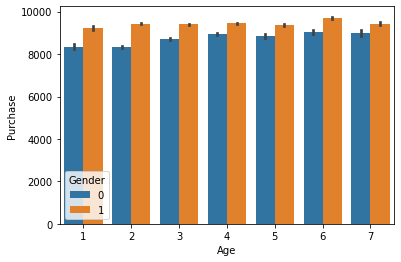

In [40]:
# EDA
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df) # Men has purchased more item than women

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

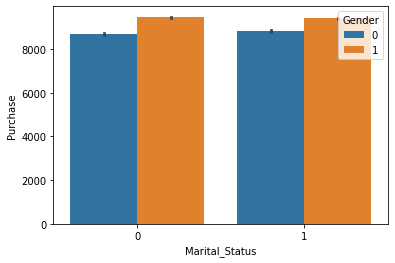

In [41]:
sns.barplot(x='Marital_Status',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

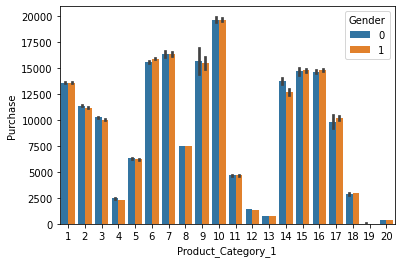

In [42]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

In [43]:
# Feature Scalling
df_test=df[df['Purchase'].isnull()] # if value of purchase is null then it will belong to df_test else df_train

In [44]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [45]:
product_id=df_test['Product_ID']

In [46]:
# Feature Scalling
df_train=df[~df['Purchase'].isnull()]

In [47]:
df_train.drop(columns=['Product_ID'],axis=1,inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_14692\667580547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Product_ID'],axis=1,inplace=True)


In [48]:
# Do train test split of df_train
X=df_train.drop(columns=['Purchase'],axis=1)
y=df_train['Purchase']

In [49]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [50]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [51]:
X.shape

(550068, 10)

In [52]:
y.shape

(550068,)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [54]:
# Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [55]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ...,  0.36891877,
         1.17569512, -0.67282374],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -1.09182956,
        -0.85056064,  1.48627336],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064, -0.67282374]])

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
my_model = XGBRegressor(n_estimators=500,learning_rate=0.1)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [57]:
my_pred=my_model.predict(X_test)

In [58]:
mean_absolute_error(my_pred, y_test)

2156.832704479272

In [59]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [60]:
df_test.drop(columns=['Purchase'],axis=1,inplace=True) 

C:\Users\ankur\AppData\Local\Temp\ipykernel_14692\1982060832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Purchase'],axis=1,inplace=True)


In [61]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,0,1


In [62]:
df_test.drop(columns=['Product_ID'],axis=1,inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_14692\1651534540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Product_ID'],axis=1,inplace=True)


In [63]:
new_pred=my_model.predict(df_test)

In [64]:
new_pred

array([14786.82   , 11531.348  ,  -513.67957, ..., 14786.82   ,
       -2916.0945 ,  -346.2598 ], dtype=float32)

In [65]:
final_pred_new=pd.DataFrame()

In [66]:
final_pred_new['Product_ID']=product_id
final_pred_new['Purchase']=new_pred

In [67]:
final_pred_new.head()

,Product_ID,Purchase
0,P00128942,14786.820312
1,P00113442,11531.347656
2,P00288442,-513.679565
3,P00145342,-513.679565
4,P00053842,-3047.381348


In [68]:
final_pred_new.to_csv("Submission.csv",index=False)

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
pred_new=model.predict(X_test)

In [73]:
pred_new

array([11827.531432  , 10472.23195058,  7361.92482116, ...,
       10419.50288826, 11647.9911962 , 10649.86876652])

In [74]:
mean_absolute_error(pred_new, y_test)

3577.2377941856957

In [75]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               Purchase   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              1142.
Date:                Fri, 14 Oct 2022   Prob (F-statistic):                        0.00
Time:                        15:54:30   Log-Likelihood:                     -3.9310e+06
No. Observations:              368545   AIC:                                  7.862e+06
Df Residuals:                  368535   BIC:                                  7.862e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 1) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [77]:
pred=regressor.predict(X_test)

In [78]:
mean_absolute_error(pred, y_test)

2361.298670991934